LSTM

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
def get_time(filename):
    values = filename.split("_")
    for t_value in values:
        if t_value in ['2','4','6','8','10','12']:
            # print(t_value)
            return int(t_value)
    return None

In [4]:
features_col = ['Arflux1','Arflux2','Arflux3','Arflux4','Arflux5','Arflux6',
            'Fflux1','Fflux2','Fflux3','Fflux4','Fflux5','Fflux6',
            'ArExponent','FrExponent',
            'yield_at_zero1','yield_at_zero2','yield_at_zero3',
            'yield_max1','yield_max2','yield_max3',
            'theta_max1','theta_max2','theta_max3','mizk',
            'p1','p2','p3','p4','p5']

In [8]:
df_final = pd.DataFrame()

test_df_final = pd.DataFrame()

file_num = 0

for folder in os.listdir('C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles'):
    file_num+=6
    
    input_values = folder.split('_')[1:]
    input_values = [float(item) for item in input_values]

    # sorting file acc to len so that t= 10,12 gets to its original pos
    for file in sorted(os.listdir(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}'), key=len):

        if(file_num<2406):
            df = pd.read_csv(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}/{file}')

        #dropping rows with zero valies in it
            zero_values_row_index = df[df['FitRadius_Avg']==0].index
            df = df.drop(zero_values_row_index)
            indexes_of_silicon = df[df['Z']>=0.001].index
            df = df.drop(indexes_of_silicon)

            new_df = pd.DataFrame()

            new_df['Z'] = df['Z']
            new_df['avg fitradius'] = df['FitRadius_Avg']
            new_df['time'] = get_time(file)

            for i in range(29):
                # print(features_col[i], input_values[i])
                new_df[features_col[i]] = input_values[i]
            df_final = pd.concat([df_final,new_df])    

        else: 

            test_df = pd.read_csv(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}/{file}')

        #dropping rows with zero valies in it
            zero_values_row_index = test_df[test_df['FitRadius_Avg']==0].index
            test_df = test_df.drop(zero_values_row_index)
            indexes_of_silicon = test_df[test_df['Z']>=0.001].index
            test_df = test_df.drop(indexes_of_silicon)


        #just for getting depth
            new_df = pd.DataFrame()

            new_df['Z'] = test_df['Z']
            new_df['avg fitradius'] = test_df['FitRadius_Avg']
            new_df['time'] = get_time(file)

            for i in range(29):
                new_df[features_col[i]] = input_values[i]
            test_df_final = pd.concat([test_df_final,new_df])    

In [91]:
df_final.head(55)

,Z,avg fitradius,time,Arflux1,Arflux2,Arflux3,Arflux4,Arflux5,Arflux6,Fflux1,...,yield_max3,theta_max1,theta_max2,theta_max3,mizk,p1,p2,p3,p4,p5
194,-0.0055,0.020906,2,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
195,-0.0045,0.021377,2,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
196,-0.0035,0.026066,2,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
197,-0.0025,0.025807,2,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
198,-0.0015,0.025487,2,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
199,-0.0005,0.025237,2,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
200,0.0005,0.024813,2,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
188,-0.0115,0.018100,4,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
189,-0.0105,0.020765,4,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0
190,-0.0095,0.023857,4,0.0011,0.0012,0.001,0.0038,0.0013,0.0047,0.0046,...,8.9143,87.7777,46.1387,49.4289,0.0249,0.0012,0.9792,0.0004,0.8607,0.0


In [77]:
#getting data from just five files
# df_first_two_times = pd.DataFrame()
# time_steps = [2,4,6,8,12]
# t = 2
# times = 1
# for index,row in df_final.iterrows():
#     if t!=row['time'] and t==12: times+=1
    
#     if t!=row['time'] and t==12 and times==6:
#         break
#     else:
#         df_first_two_times = pd.concat([df_first_two_times,row],axis=1)
#     t = row['time']
  

In [82]:
# test_df_first_two_times = pd.DataFrame()
# time_steps = [2,4,6,8,12]
# t = 2
# times = 1
        
# for index,row in test_df_final.iterrows():
#     if t!=row['time'] and t==12: times+=1
    
#     if t!=row['time'] and t==12 and times==6:
#         break
#     else:
#         test_df_first_two_times = pd.concat([test_df_first_two_times,row],axis=1)
#     t = row['time']

In [102]:
# df_first_two_times = df_first_two_times.T
# test_df_first_two_times = test_df_first_two_times.T

In [109]:
# test_df_first_two_times= test_df_first_two_times.reset_index().drop(['index'],axis=1)
# df_first_two_times= df_first_two_times.reset_index().drop(['index'],axis=1)

In [ ]:
# test_df_first_two_times

In [29]:
x_train = df_final.loc[:, ~df_final.columns.isin(['avg fitradius'])]
y_train = df_final[['avg fitradius']]
y_test = test_df_final[['avg fitradius']]
x_test = test_df_final.drop(['avg fitradius'], axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler_x_train = StandardScaler()
X_scale_arr = scaler_x_train.fit_transform(x_train)
df_scaledX = pd.DataFrame(X_scale_arr, columns=x_train.columns)

scaler_y_train = StandardScaler()
y_scale_arr = scaler_y_train.fit_transform(y_train)
df_scaledy = pd.DataFrame(y_scale_arr, columns=y_train.columns)

scaler_x_test = StandardScaler()
X_scale_t_arr = scaler_x_test.fit_transform(x_test)
df_scaledX_t = pd.DataFrame(X_scale_t_arr, columns=x_test.columns)

scaler_y_test = StandardScaler()
y_scale_t_arr = scaler_y_test.fit_transform(y_test)
df_scaledy_t = pd.DataFrame(y_scale_t_arr, columns=y_test.columns)


X_train_scaled_reshaped = X_scale_arr.reshape(X_scale_arr.shape[0],1,X_scale_arr.shape[1])
X_train_scaled_reshaped.shape

X_test_scaled_reshaped = X_scale_t_arr.reshape(X_scale_t_arr.shape[0],1,X_scale_t_arr.shape[1])
X_test_scaled_reshaped.shape

(73408, 1, 31)

In [148]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense


# def create_lstm_model(input_shape):
#     model = Sequential()
#     model.add(LSTM(100, input_shape=input_shape,return_sequences=True))
#     model.add(LSTM(50))
#     model.add(Dense(1))  # Assuming 2 target variables
#     model.compile(optimizer='adam', loss='mae')
#     return model

Using pytorch instead of keras

In [294]:
from scipy.stats import weibull_min
import torch
class WeibullLayer(nn.Module):
    def __init__(self, column_index, shape):
        super(WeibullLayer, self).__init__()
        self.column_index = column_index
        self.shape = shape

    def forward(self, inputs):
        specific_column = inputs[:, :, self.column_index]
        weibull_values = torch.tensor(weibull_min.pdf(specific_column.detach().numpy(), self.shape), dtype=torch.float32)
        weibull_values = weibull_values.unsqueeze(-1)
        return weibull_values


In [298]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error


class LSTMWithWeibullModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, weibull_column_index, weibull_shape=2.8):
        super(LSTMWithWeibullModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.weibull_layer = WeibullLayer(column_index=weibull_column_index, shape=weibull_shape)
        self.fc = nn.Linear(hidden_size + 1, output_size)

    def forward(self, inputs):
        lstm_out, _ = self.lstm(inputs)
        weibull_values = self.weibull_layer(inputs)
        weibull_values = weibull_values.repeat(1, lstm_out.size(1), 1)
        concatenated = torch.cat((lstm_out, weibull_values), dim=2)
        output = self.fc(concatenated.view(concatenated.size(0), -1))
        return output

def train_model(model, train_loader, optimizer, criterion, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}')

def evaluate_model(model, dataloader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for inputs, targets_batch in dataloader:
            outputs = model(inputs)
            predictions.extend(outputs.squeeze().tolist())
            targets.extend(targets_batch.squeeze().tolist())
    mse = mean_absolute_error(targets, predictions)
    print(f'Mean Squared Error: {mse}')


In [306]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled_reshaped, dtype=torch.float32)
y_train_tensor = torch.tensor(y_scale_arr, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled_reshaped, dtype=torch.float32)
y_test_tensor = torch.tensor(y_scale_t_arr, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the model
lstm_with_weibull_model = LSTMWithWeibullModel(
    input_size=X_train_tensor.shape[2],
    hidden_size=100,
    output_size=1,
    weibull_column_index=0
)

# Define optimizer and loss function
optimizer = optim.Adam(lstm_with_weibull_model.parameters())
loss_function = nn.L1Loss() #mae

# Train the model
train_model(lstm_with_weibull_model, train_loader, optimizer, loss_function, epochs=100)

# Evaluate the model
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32)
evaluate_model(lstm_with_weibull_model, test_loader)

# Predict on the test set
lstm_with_weibull_model.eval()
with torch.no_grad():
    y_pred_tensor = lstm_with_weibull_model(X_test_tensor)
y_pred = y_pred_tensor.numpy()


Epoch 1/100, Loss: 0.2346677395146389
Epoch 2/100, Loss: 0.16228231975322951
Epoch 3/100, Loss: 0.14579301201498007
Epoch 4/100, Loss: 0.13519967621048765
Epoch 5/100, Loss: 0.12782128240888208
Epoch 6/100, Loss: 0.1220975880628462
Epoch 7/100, Loss: 0.11713681861487828
Epoch 8/100, Loss: 0.11318335529803075
Epoch 9/100, Loss: 0.10937120984124976
Epoch 10/100, Loss: 0.10616377182213069
Epoch 11/100, Loss: 0.10308992276062955
Epoch 12/100, Loss: 0.10042796887682635
Epoch 13/100, Loss: 0.09783113192988606
Epoch 14/100, Loss: 0.09550136348002233
Epoch 15/100, Loss: 0.09335443969165552


In [300]:
y_pred

array([[-0.9211042 ],
       [-0.88160264],
       [-0.8441881 ],
       ...,
       [ 0.13012359],
       [ 0.11822807],
       [ 0.10628925]], dtype=float32)

In [224]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Concatenate, Lambda, Input
from scipy.stats import weibull_min  

shape = 7.31
scale = 1.27
weibull_column_index = 0
# def weibull_pdf(x):
#     hazard_function = (shape / scale) * ((x[:, weibull_column_index] / scale) ** (shape - 1)) * tf.exp(-((x[:, weibull_column_index] / scale) ** shape))
#     print(hazard_function)
#     return x

def create_lstm_w_weibull_model(input_shape):

    inputs = Input(shape=input_shape)
    x = LSTM(100, return_sequences=True)(inputs)

    column_index = 0  # Index of the 'part' column
    weibull_values = WeibullLayer(column_index=column_index)(inputs)
 
    x = Concatenate(axis=1)([x, weibull_values])  
    outputs = (Dense(1)(x))  # Assuming 2 target variables
    model = Model(inputs=inputs, outputs=outputs)
    return model



In [225]:
# Build and train the model
model = create_lstm_model(input_shape=(X_train_scaled_reshaped.shape[1], X_train_scaled_reshaped.shape[2]))
model.fit(X_train_scaled_reshaped, y_scale_arr, epochs=10, batch_size=2, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test_scaled_reshaped)

AttributeError: Exception encountered when calling layer "weibull_layer_9" (type WeibullLayer).

in user code:

    File "C:\Users\jayra\AppData\Local\Temp\ipykernel_27500\3404810876.py", line 18, in call  *
        weibull_values = weibull_min.pdf(shape, scale=scale.make_ndarray(), size=tf.shape(specific_column)[0])

    AttributeError: 'SymbolicTensor' object has no attribute 'make_ndarray'


Call arguments received by layer "weibull_layer_9" (type WeibullLayer):
  • inputs=tf.Tensor(shape=(None, 1, 31), dtype=float32)

In [301]:
from sklearn.metrics import make_scorer, mean_squared_error,mean_absolute_error, r2_score

def custom_mse(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def custom_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

mse_scorer = make_scorer(custom_mse, greater_is_better=False)
r2_scorer = make_scorer(custom_r2)

In [302]:
# Evaluate the model
predictions = scaler_y_test.inverse_transform(y_pred)

mae = custom_mse(y_scale_t_arr,predictions)
r2_score = custom_r2(y_scale_t_arr, predictions)

print("Mean Abs Error (MAE):", mae)
print("R2 score: ", r2_score)

Mean Abs Error (MAE): 0.7628329881250626
R2 score:  0.011391767113009155


In [303]:
predictions = scaler_y_test.inverse_transform(y_pred)
X_test_plot = scaler_x_test.inverse_transform(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0],31))

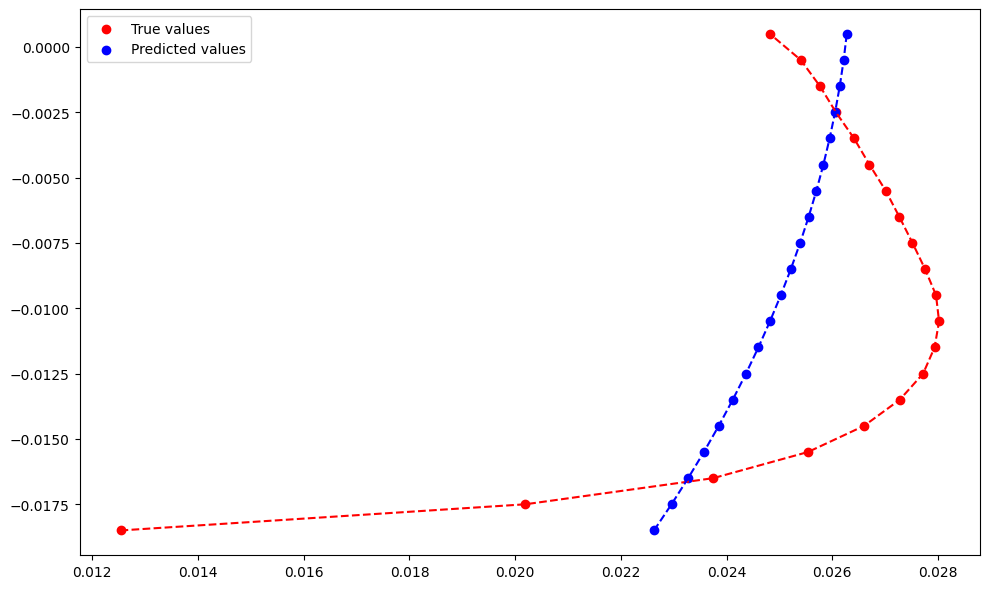

In [304]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
#for t=2 and first param values
plt.scatter(y_test.iloc[:20],X_test_plot[:20,0],c='red',label=f'True values')
plt.plot(y_test.iloc[:20],X_test_plot[:20,0],'r--')
plt.scatter(predictions[:20],X_test_plot[:20,0],c='blue',label=f'Predicted values')
plt.plot(predictions[:20],X_test_plot[:20,0],'b--')
plt.legend()

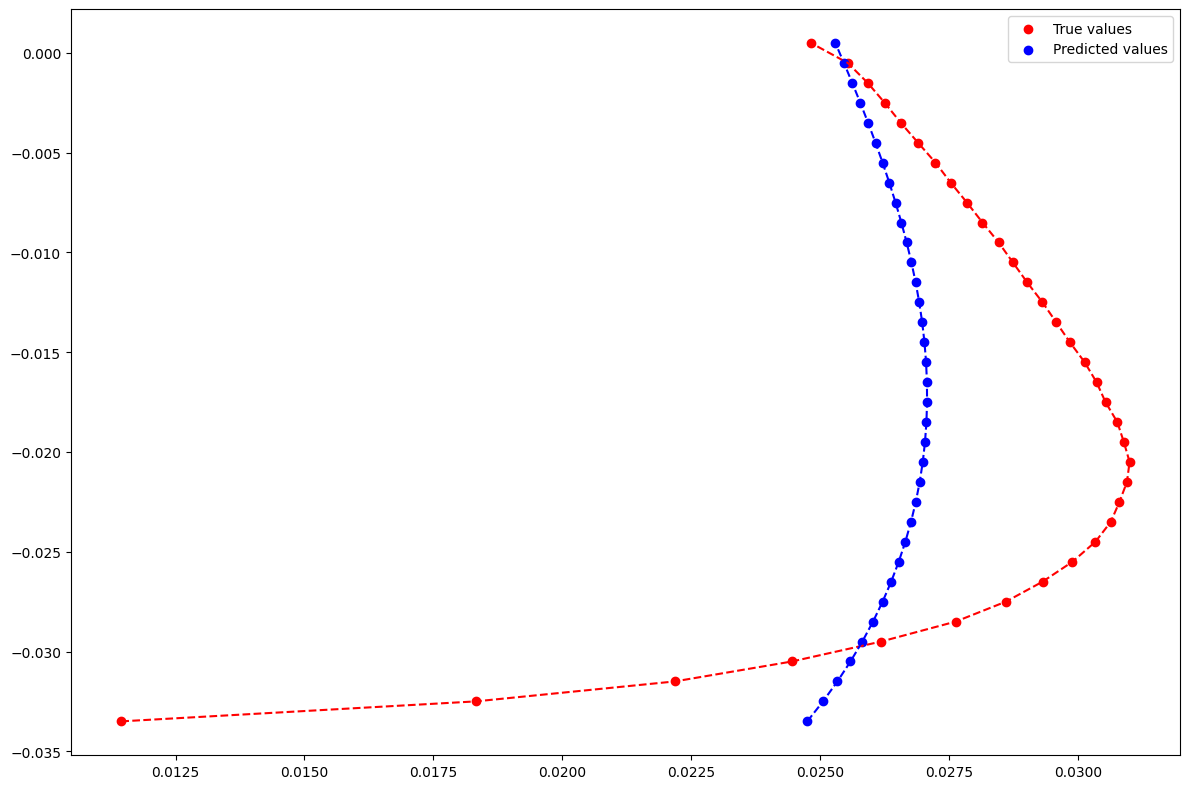

In [305]:
plt.scatter(y_test.iloc[20:55],X_test_plot[20:55,0],c='red',label=f'True values')
plt.plot(y_test.iloc[20:55],X_test_plot[20:55,0],'r--')
plt.scatter(predictions[20:55],X_test_plot[20:55,0],c='blue',label=f'Predicted values')
plt.plot(predictions[20:55],X_test_plot[20:55,0],'b--')
plt.legend()